<a href="https://colab.research.google.com/github/ajaythakur3369/CodersCave-Internship/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Speech Emotion Recognition**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - CodersCave**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CodersCave-Internship)**

# **Problem Statement -**

The objective of this project is to develop a robust speech-emotion recognition system capable of accurately classifying the emotional states conveyed in spoken language. By analyzing the acoustic features of speech signals, the system should be able to categorize emotions such as happiness, sadness, anger, fear, and more

In [ ]:
# Imported all necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [ ]:
# Access the drive from Colab in order to access the file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
paths = []
labels = []
for dirname, _ , filenames in os.walk('/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodersCave/Folder_Name/TESS_dataset'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded successfully')

Dataset is loaded successfully


In [ ]:
paths[:5]

['/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodersCave/Folder_Name/TESS_dataset/YAF_sad/YAF_witch_sad.wav',
 '/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodersCave/Folder_Name/TESS_dataset/YAF_sad/YAF_void_sad.wav',
 '/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodersCave/Folder_Name/TESS_dataset/YAF_sad/YAF_vote_sad.wav',
 '/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodersCave/Folder_Name/TESS_dataset/YAF_sad/YAF_young_sad.wav',
 '/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodersCave/Folder_Name/TESS_dataset/YAF_sad/YAF_wife_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/Colab_Notebook/Internsh...,sad
1,/content/drive/MyDrive/Colab_Notebook/Internsh...,sad
2,/content/drive/MyDrive/Colab_Notebook/Internsh...,sad
3,/content/drive/MyDrive/Colab_Notebook/Internsh...,sad
4,/content/drive/MyDrive/Colab_Notebook/Internsh...,sad


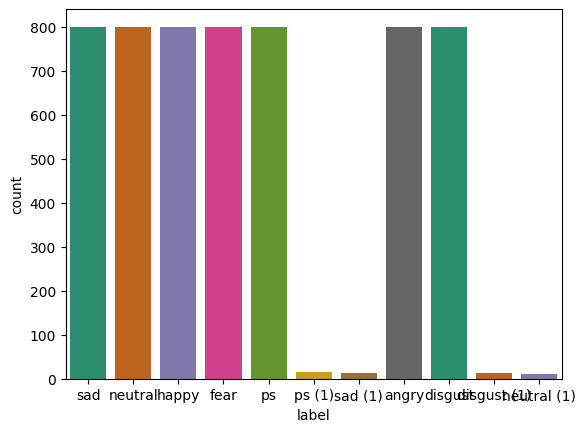

In [ ]:
sns.countplot(data = df, x = 'label', palette = 'Dark2');
plt.show()

In [ ]:
df['label'].value_counts()

label
sad            800
neutral        800
happy          800
fear           800
ps             800
angry          800
disgust        800
ps (1)          16
sad (1)         13
disgust (1)     13
neutral (1)     10
Name: count, dtype: int64

**EDA**

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr = sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11, 4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

**Fear Emotion Waves**

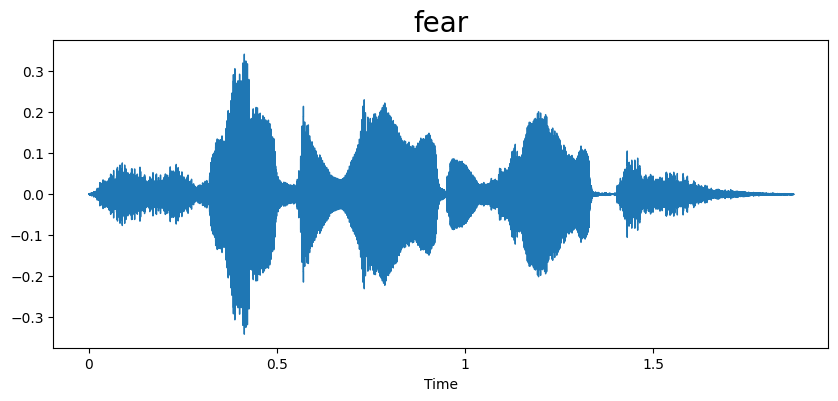

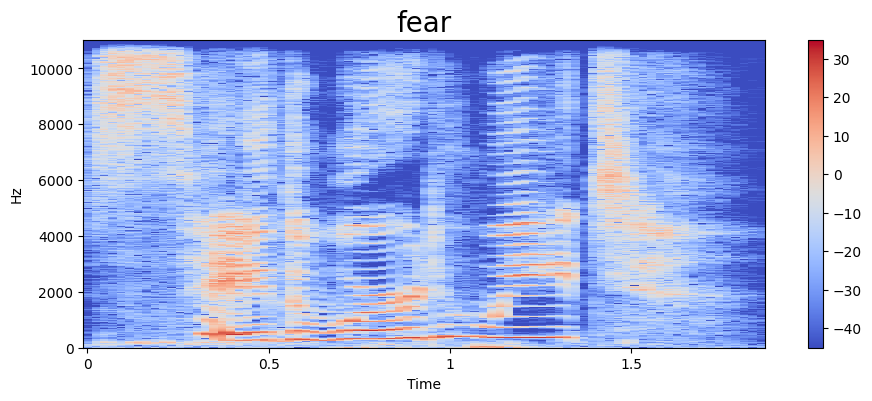

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Angry Emotion Waves**

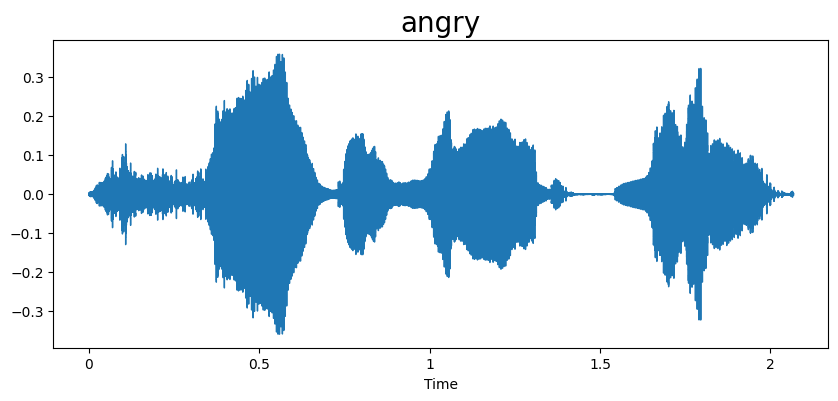

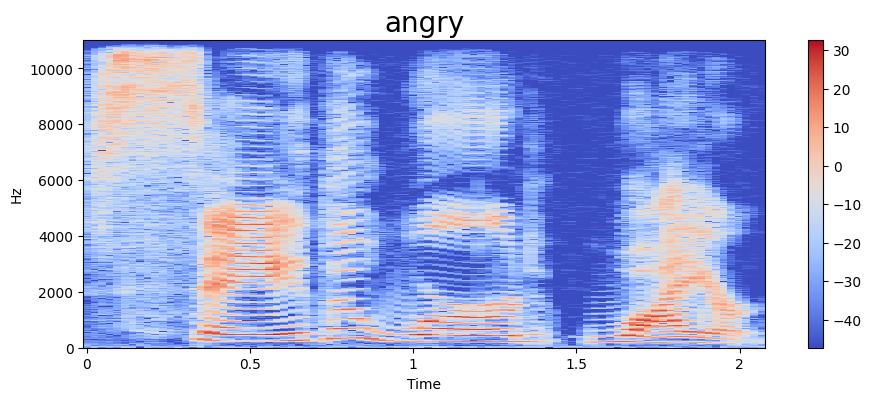

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Disgust Emotion Waves**

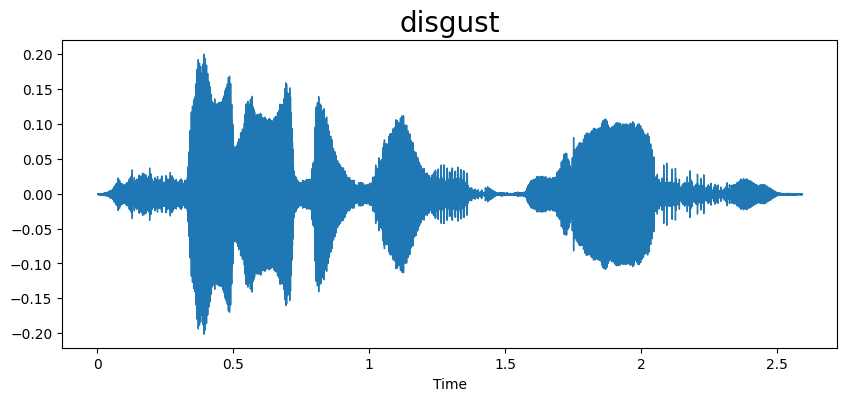

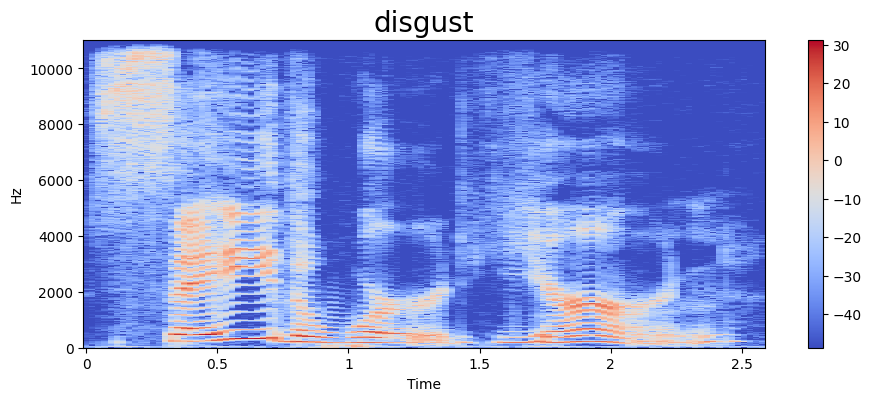

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Neutral Emotion Waves**

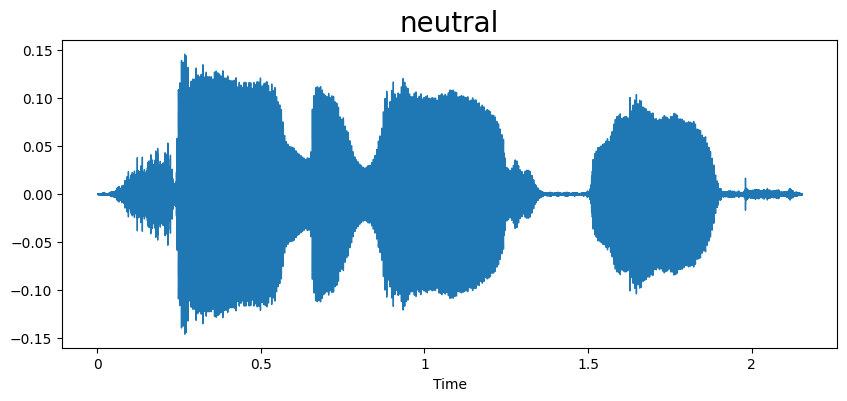

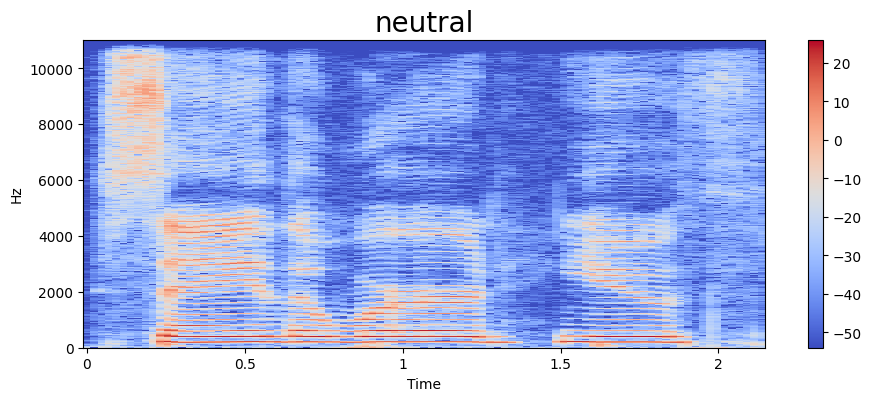

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Sadness Emotion Waves**

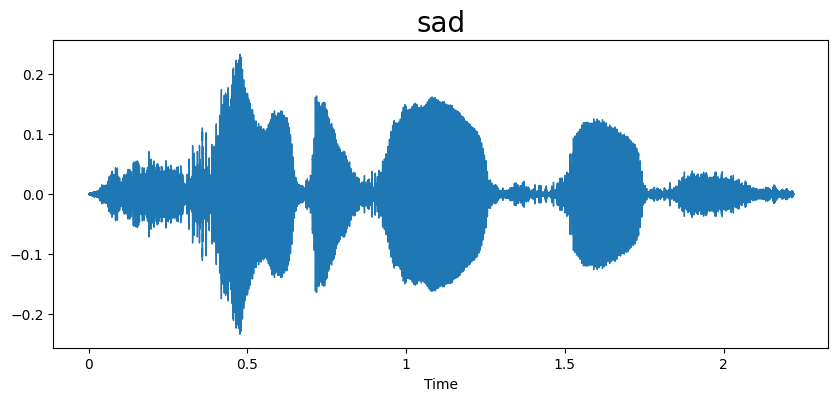

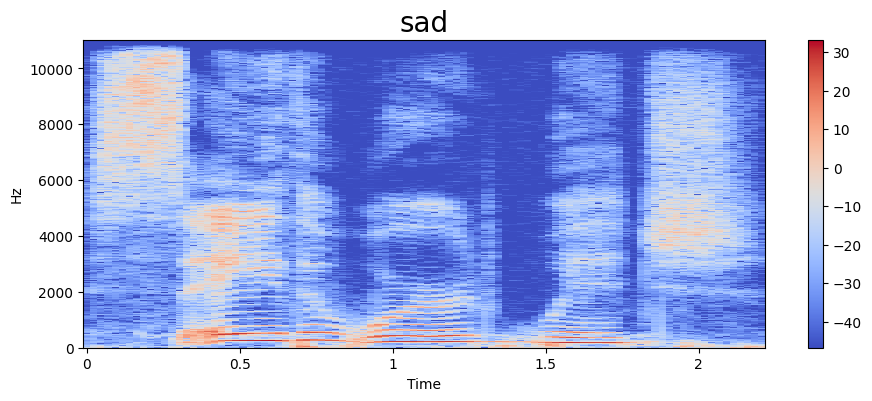

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Ps Emotion Waves**

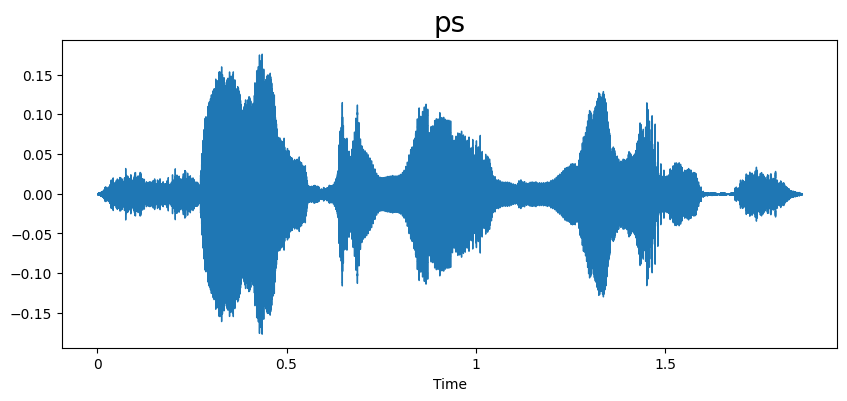

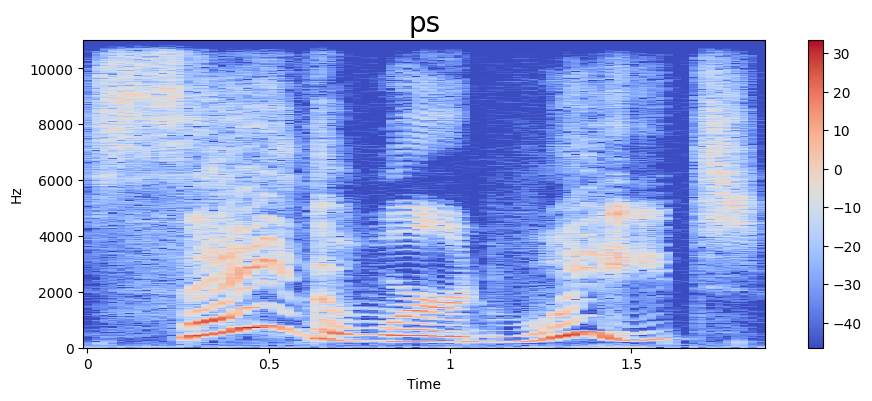

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Happiness Emotion Waves**

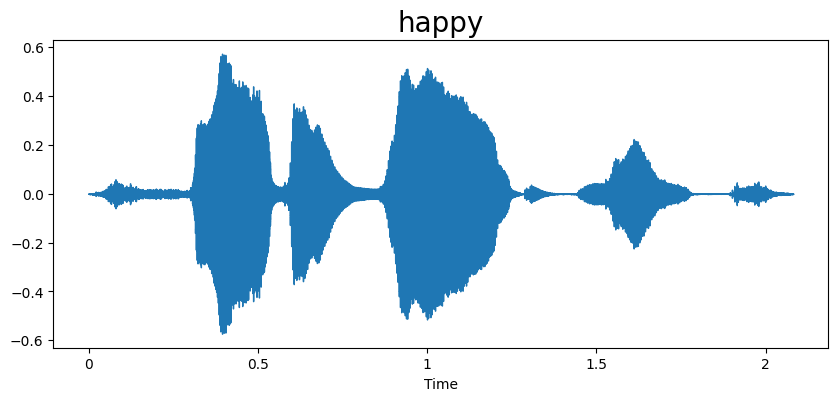

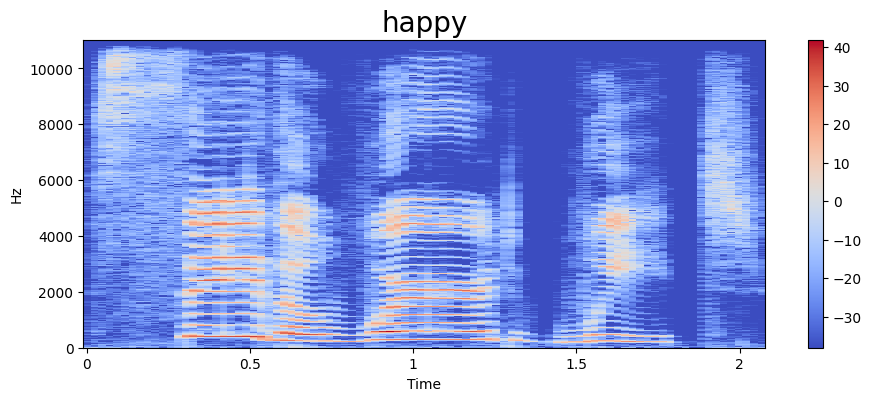

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.0648056e+02,  8.0379883e+01,  3.2462395e+01,  4.6579094e+01,
       -1.6833985e+00,  1.3425337e+01,  3.1219544e+00, -1.2444943e+01,
        1.7795047e+00, -3.6690445e+00, -6.6020999e+00,  5.3937435e+00,
       -8.9992819e+00,  8.9897099e+00, -6.6332731e+00, -8.1748456e-01,
        2.3435295e+00, -3.9852490e+00, -4.3765616e+00, -2.9637237e+00,
       -6.8965549e+00, -7.4044752e+00, -6.8668838e+00,  3.1179738e+00,
       -3.3834832e+00,  6.1521802e+00,  4.7911525e+00,  1.9219908e+00,
        1.9905318e+00, -2.8049028e-01,  6.6478205e-01,  9.9237022e+00,
        6.5527177e+00,  1.1472418e+01,  3.0395870e+00,  4.5302086e+00,
        1.1828440e+00,  5.8002324e+00,  5.0913544e+00,  6.7729721e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-406.48056, 80.37988, 32.462395, 46.579094, -...
1       [-418.53574, 88.28475, 27.516254, 37.002735, -...
2       [-426.8775, 91.07639, 22.93411, 25.029156, -3....
3       [-434.86185, 89.90637, 28.37326, 39.577065, -2...
4       [-436.84772, 95.58144, 28.280148, 29.897081, 4...
                              ...                        
5647    [-466.92065, 112.404884, 14.052379, -4.629206,...
5648    [-461.95944, 108.12082, 1.3323041, -13.464308,...
5649    [-455.59076, 101.503174, 5.839498, -8.426509, ...
5650    [-507.5372, 123.33838, 55.190735, -1.4263653, ...
5651    [-445.97076, 88.4885, 22.814644, 9.285435, 24....
Name: speech, Length: 5652, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5652, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(5652, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(5652, 11)

**LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences = False, input_shape = (40, 1)),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    # Change the number of units to 11
    Dense(11, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 11)               

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense, LSTM, Dropout

#model = Sequential([
  #  LSTM(256, return_sequences = False, input_shape = (40, 1)),
  #  Dropout(0.2),
  #  Dense(128, activation = 'relu'),
  #  Dropout(0.2),
 #   Dense(64, activation = 'relu'),
  #  Dropout(0.2),
  #  Dense(7, activation = 'softmax')
#])

#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
history = model.fit(X, y, validation_split = 0.2, epochs = 50, batch_size = 64)

Epoch 1/50
71/71 [==============================] - 22s 263ms/step - loss: 1.0109 - accuracy: 0.6452 - val_loss: 0.5332 - val_accuracy: 0.7303
Epoch 2/50
71/71 [==============================] - 25s 347ms/step - loss: 0.3434 - accuracy: 0.9095 - val_loss: 0.4899 - val_accuracy: 0.8347
Epoch 3/50
71/71 [==============================] - 14s 193ms/step - loss: 0.2523 - accuracy: 0.9361 - val_loss: 0.1038 - val_accuracy: 0.9655
Epoch 4/50
71/71 [==============================] - 14s 193ms/step - loss: 0.2083 - accuracy: 0.9529 - val_loss: 0.1223 - val_accuracy: 0.9576
Epoch 5/50
71/71 [==============================] - 14s 193ms/step - loss: 0.1610 - accuracy: 0.9593 - val_loss: 0.0863 - val_accuracy: 0.9735
Epoch 6/50
71/71 [==============================] - 12s 173ms/step - loss: 0.1597 - accuracy: 0.9631 - val_loss: 0.0752 - val_accuracy: 0.9770
Epoch 7/50
71/71 [==============================] - 13s 177ms/step - loss: 0.1518 - accuracy: 0.9626 - val_loss: 0.1386 - val_accuracy: 0.9576

In [ ]:
acc = history.history['accuracy']
mean_accuracy = sum(acc)/len(acc)
mean_accuracy*100

97.00464522838593

**Plotting Results**

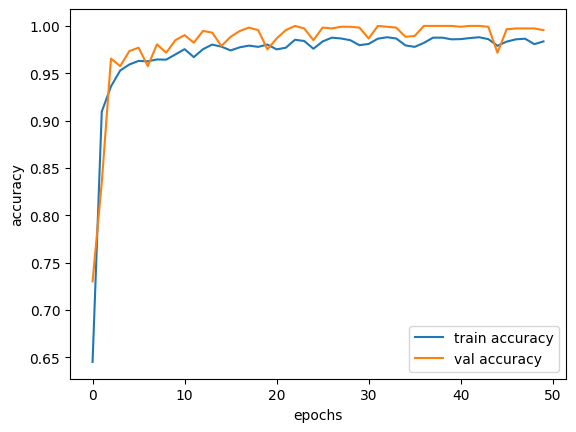

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

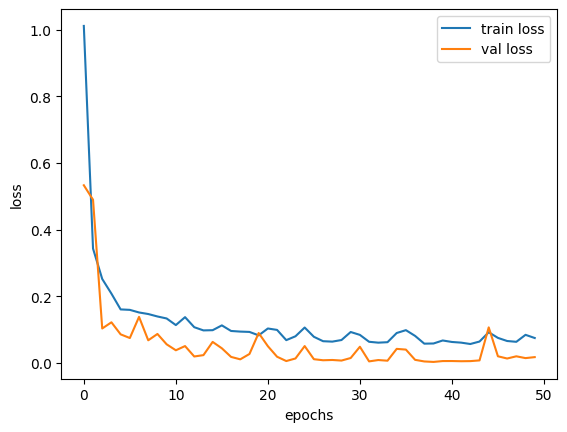

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()